# Info 

Image Editing using Stable Diffusion Pix2Pix

Huggingface [Repo](https://huggingface.co/timbrooks/instruct-pix2pix)

In [ ]:
!pip install diffusers accelerate safetensors transformers

In [ ]:
import PIL
import requests
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline, EulerAncestralDiscreteScheduler

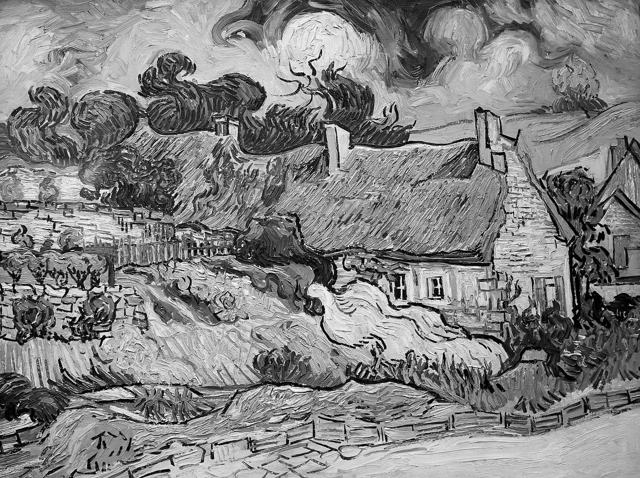

In [ ]:
# user input image 
image = PIL.Image.open('/content/ref.jpg').convert('L')
image = image.resize((640, 478))
image

In [ ]:
# grayscale -> RGB color 
# 채널 수를 맞춰주기 위함 

# 흑백 이미지의 크기를 가져옴
width, height = image.size

# 3채널로 늘릴 흑백 이미지의 채널 튜플 생성
channels = (image,) * 3

# 3채널 컬러 이미지 생성
image_gray = PIL.Image.merge("RGB", channels)

In [ ]:
model_id = "timbrooks/instruct-pix2pix"
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16, safety_checker=None)
pipe.to("cuda")
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

  0%|          | 0/50 [00:00<?, ?it/s]

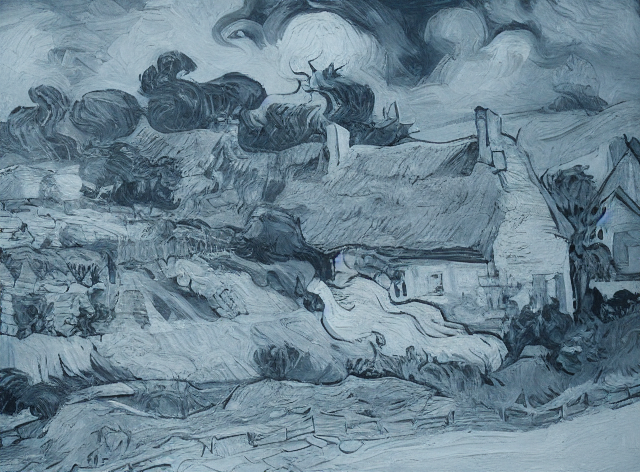

In [ ]:
# Editing -> color 
prompt = "into shades over blue"
generator = torch.Generator("cuda").manual_seed(21)
images = pipe(prompt, image=image_gray, num_inference_steps=50, image_guidance_scale=0.01, strength=0.3, generator=generator).images
images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

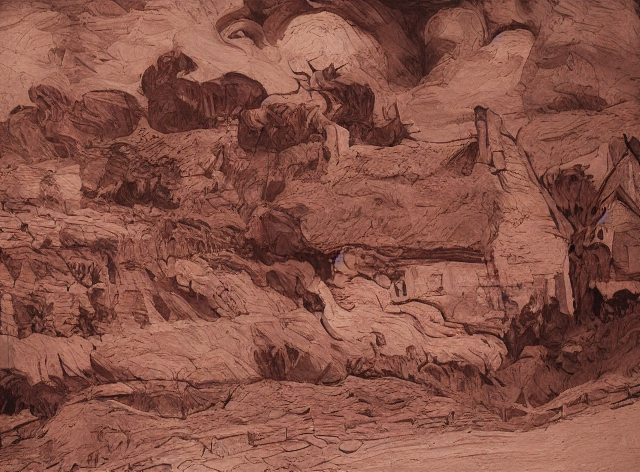

In [ ]:
# Editing -> color
prompt = "into shades over red"
generator = torch.Generator("cuda").manual_seed(21)
images = pipe(prompt, image=image_gray, num_inference_steps=50, image_guidance_scale=0.01, strength=0.3, generator=generator).images
images[0]

  0%|          | 0/10 [00:00<?, ?it/s]

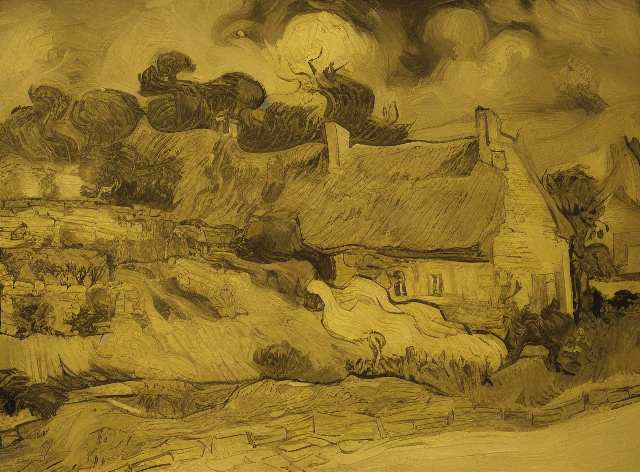

In [ ]:
# Editing -> color
prompt = "into shades over color yellow"
generator = torch.Generator("cuda").manual_seed(21)
images = pipe(prompt, image=image_gray, num_inference_steps=10, image_guidance_scale=0.01, strength=0.3, generator=generator).images
images[0]